In [16]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [17]:
# Load the CSV file using pandas
data = pd.read_csv('F:\\CS 325 Data Mining\\Datasets\\archive\\Heart.csv')
data.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [18]:
X= data.iloc[:,1:14]
Y= data.iloc[:,-1]
data['ChestPain'].replace(['typical', 'nontypical', 'nonanginal', 'asymptomatic'], [1,2,3,4], inplace=True)
data['Thal'].replace(['normal', 'fixed', 'reversable'], [1,2,3], inplace=True)
data['AHD'].replace(['No', 'Yes'], [0,1], inplace=True)
data.replace('NA', np.nan, inplace = True)
data.replace(' ', np.nan, inplace = True)
data.dropna( inplace = True, how = 'any')
data = data[data.Thal != '.']
data.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,2.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,1.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,3.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,1.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1.0,0


In [19]:
# Separate the features (X)
X = data.iloc[:, :-1]  # Assuming the target variable is not included in the last column

In [20]:
# Scale the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
# Perform hierarchical clustering
linkage_matrix = linkage(X_scaled, method='ward')

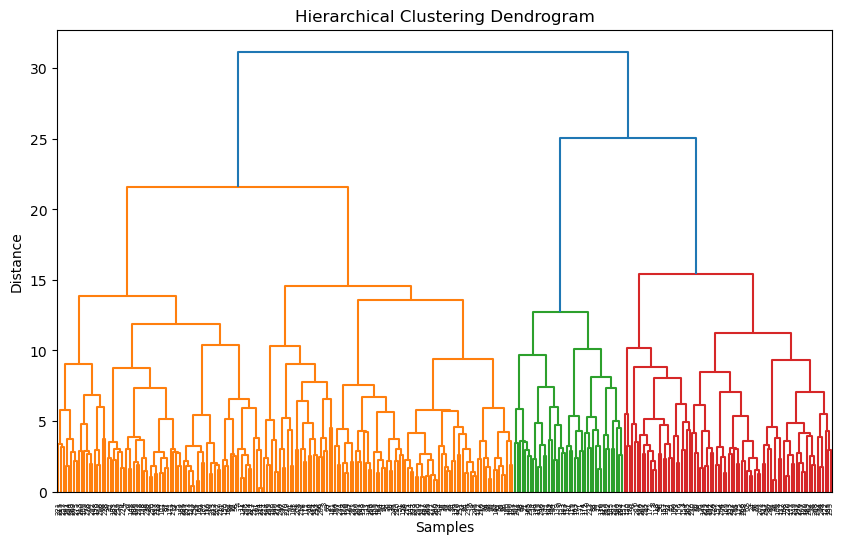

In [22]:
# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()